In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
def f(x)

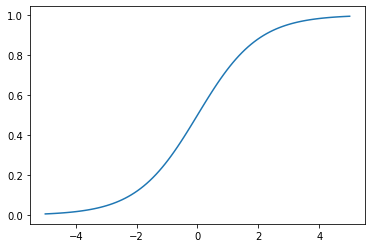

In [5]:
x=np.linspace(-5,5,100)
plt.plot(x,LogisticRegrasion.sigmoid(x))

In [10]:
class LogisticRegrasion():
    def sigmoid(x): #sigmoid function 
        return 1/(1+np.exp(-x))
    ################################################ Optimization methods################################################
    def GD(X,Y,alpha,itter): #Gradient Descent 
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,n_f+1)
        X=np.append(X,np.ones((n_s,1)),axis=1)
        print('w start= ',w)
        cost=np.zeros(itter)
        for i in range(itter): 
            dw,error=LogisticRegrasion.loss[self.loss_function](X,Y,w)
            dw=dw/n_s
            cost[i]=error/n_s
            #dw = ((LogisticRegrasion.sigmoid(X@w) - Y) @ X )/n_s
            w=w-alpha*dw
            #predictions=LogisticRegrasion.sigmoid(X@w)
            #error = (-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions))
            #cost[i]=(1/n_s) * sum(error)
        return w,cost
    
    def MBGD(X,Y,alpha,batch_size,epoch_number): #mini batch gradient descent
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,n_f+1)
        X=np.append(X,np.ones((n_s,1)),axis=1)
        print('w start= ',w)
        cost=np.zeros(epoch_number*int(n_s/batch_size))
        p=np.random.permutation(n_s)
        X=X[p]
        Y=Y[p]
        for i in range(epoch_number):
            for j in range(int(n_s/batch_size)):

                X_batch=X[j*batch_size:min(n_s,(batch_size+1)*j)] 
                Y_batch=Y[j*batch_size:min(n_s,(batch_size+1)*j)]
                dw,error=LogisticRegrasion.loss[self.loss_function](X,Y,w)
                dw=dw/batch_size
                cost[i]=error/n_s
                #dw = ((LogisticRegrasion.sigmoid(X_batch@w) - Y_batch) @ X_batch )/batch_size
                w=w-alpha*dw
                #predictions=LogisticRegrasion.sigmoid(X@w)
                #error = (-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions))
                #cost[i]=(1/n_s) * sum(error)

        return w,cost
    
    def MomentumSGD(X,Y,alpha,batch_size,epoch_number,beta): #mini batch stochastic gradient descent with momentum
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,n_f+1)
        dw_avg=np.zeros(n_f+1)
        X=np.append(X,np.ones((n_s,1)),axis=1)
        print('w start= ',w)
        cost=np.zeros(epoch_number*int(n_s/batch_size))
        for i in range(epoch_number):
            p=np.random.permutation(n_s)
            X=X[p]
            Y=Y[p]
            for j in range(int(n_s/batch_size)):
                X_batch=X[j*batch_size:min(n_s,(batch_size+1)*j)] 
                Y_batch=Y[j*batch_size:min(n_s,(batch_size+1)*j)]
                dw,error=LogisticRegrasion.loss[self.loss_function](X,Y,w)
                dw=dw/batch_size
                cost[i]=error/n_s

                #dw = ((LogisticRegrasion.sigmoid(X_batch@w) - Y_batch) @ X_batch )/batch_size
                dw_avg = ( beta * dw_avg + (1-beta) * dw )
                w=w-alpha*dw_avg
                
                #predictions=LogisticRegrasion.sigmoid(X@w)
                #error = (-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions))
                #cost[i]=(1/n_s) * sum(error)
        return w,cost

    def rmsSGD(X,Y,alpha,batch_size,epoch_number,gamma,eps): #mini batch stochastic gradient descent with rms
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,n_f+1)
        dw_avg=np.zeros(n_f+1)
        X=np.append(X,np.ones((n_s,1)),axis=1)
        print('w start= ',w)
        cost=np.zeros(epoch_number*int(n_s/batch_size))
        for i in range(epoch_number):
            p=np.random.permutation(n_s)
            X=X[p]
            Y=Y[p]
            for j in range(int(n_s/batch_size)):
                X_batch=X[j*batch_size:min(n_s,(batch_size+1)*j)] 
                Y_batch=Y[j*batch_size:min(n_s,(batch_size+1)*j)]
                dw,error=LogisticRegrasion.loss[self.loss_function](X,Y,w)
                dw=dw/batch_size
                cost[i]=error/n_s
                #dw = ((LogisticRegrasion.sigmoid(X_batch@w) - Y_batch) @ X_batch )/batch_size
                dw_avg = ( gamma * dw_avg + (1-gamma) * dw**2 )
                w = w - alpha*dw/np.sqrt(dw_avg+eps)
                #predictions=LogisticRegrasion.sigmoid(X@w)
                #error = (-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions))
                #cost[i]=(1/n_s) * sum(error)
        return w,cost
    
    ########################################## end optimization methods ######################################################################### 
    ##########################################      loss functions      #########################################################################
    def log_loss(X,Y,w):
        predictions=LogisticRegrasion.sigmoid(X@w)
        error = sum((-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions)))
        dw = (LogisticRegrasion.sigmoid(X@w) - Y) @ X
        return dw,error
    
    optimization={'GD':GD,'MBGD':MBGD,'MomentumSGD':MomentumSGD,'rmsSGD':rmsSGD}
    loss={'log':log_loss}
    
    def __init__(self,loss_function,optimization_method):
        self.loss_function=loss_function
        self.optimization_method=optimization_method
        
        if self.optimization_method=='GD':
            print('please enter learning rate ($\\alpha$) and number of itterations:')
            print('alpha=',end="")
            self.alpha=float(input())
            print(self.alpha)
            print('number of itterations:',end="")
            self.itter=int(input())
            print(self.itter)
        
        if self.optimization_method=='MBGD' or self.optimization_method=='MomentumSGD':
            print('please enter learning rate ($\\alpha$), batch_size and number of epochs and beta:')
            
            print('alpha= ',end="")
            self.alpha=float(input())
            print(self.alpha)
            
            print('batch size= ',end="")
            self.batch=int(input())
            print(self.batch)
            
            print('number of epochs= ',end="")
            self.epochs=int(input())
            print(self.epochs)

            print('beta= ',end="")
            self.beta=float(input())
            print(self.beta)

        if self.optimization_method=='rmsSGD':
            print('please enter learning rate ($\\alpha$), batch_size and number of epochs and gamma:')
            
            print('alpha= ',end="")
            self.alpha=float(input())
            print(self.alpha)
            
            print('batch size= ',end="")
            self.batch=int(input())
            print(self.batch)
            
            print('number of epochs= ',end="")
            self.epochs=int(input())
            print(self.epochs)

            print('gamma= ',end="")
            self.gamma=float(input())
            print(self.gamma)

            print('epsilon= ',end="")
            self.eps=float(input())
            print(self.eps)
        



    def fit(self,X,Y):
        if self.optimization_method=='GD':
            self.w_fit,self.cost=LogisticRegrasion.optimization[self.optimization_method](X,Y,self.alpha,self.itter)
        if self.optimization_method=='MBGD':
            self.w_fit,self.cost=LogisticRegrasion.optimization[self.optimization_method](X,Y,self.alpha,self.batch,self.epochs)
        if self.optimization_method=='MomentumSGD':
            self.w_fit,self.cost=LogisticRegrasion.optimization[self.optimization_method](X,Y,self.alpha,self.batch,self.epochs,self.beta)
        if self.optimization_method=='rmsSGD':
            self.w_fit,self.cost=LogisticRegrasion.optimization[self.optimization_method](X,Y,self.alpha,self.batch,self.epochs,self.gamma,self.eps)


        


In [2]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=5000,centers=[[1,4], [10,4]])

#plt.scatter(*X.T, c=Y)

In [11]:
clf=LogisticRegrasion('log','rmsSGD')
clf.fit(X,Y)

please enter learning rate ($\alpha$), batch_size and number of epochs and gamma:
alpha= 0.1
batch size= 100
number of epochs= 1
gamma= 0.9
epsilon= 1e-06
w start=  [ 0.16952254 -1.48975619  1.92474729]


NameError: name 'self' is not defined

In [13]:
clf.loss_function

'log'

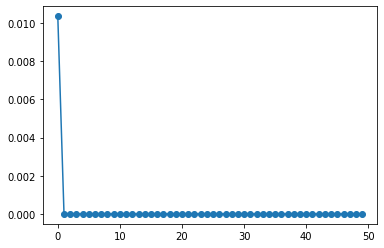

In [142]:
plt.plot(clf.cost,'-o')

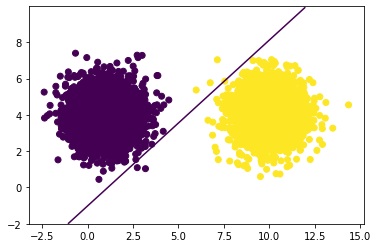

In [143]:
delta=0.02
x = np.arange(-2, 12, delta)
y = np.arange(-2, 10, delta)
X1, Y1 = np.meshgrid(x, y)
Z1 = clf.w_fit[0]*X1 +clf.w_fit[1]*Y1+clf.w_fit[2]
plt.contour(X1,Y1,Z1,[0])
plt.scatter(*X.T, c=Y)
